<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**ТЗ**

Инструкция по выполнению проекта

- Загрузите и изучите данные.
- Ответьте на вопрос и обоснуйте решение. 
- Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

 a. Изменится. Приведите примеры матриц.
 
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
 
 
- Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
- Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.


## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/datasets/insurance.csv', encoding='UTF-8')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


- Пол, страховые выплаты – категориальные признаки
- Возраст, зарплата, члени семьи – количественные признаки

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


In [5]:
df.shape

(5000, 5)

In [6]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [7]:
cols_new = ['gender', 'age', 'salary', 'family_members', 'insurance_payment']

cols = {}
for key, val in zip(df.columns, cols_new):
    cols.update({key : val})
    
df = df.rename(columns=cols)
df.head()

,gender,age,salary,family_members,insurance_payment
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


**Вывод по предобработке данных**

- Пропусков нет
- Дубликаты не ищу, так как здесь данные обезличены и у нескольких пользователей могут быть одинаковые параметры
- Типы данных оставил неизменными
- Названия полей переименованы

**EDA**

In [8]:
def graphs_creator(field):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df[field], kde=True, alpha=0.5)
    plt.title(f'Распределение по {field}')
    plt.xlabel(f'{field}')
    plt.ylabel('Количество')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[field])
    plt.title(f'Boxplot по {field}')
    plt.xlabel(f'{field}')
    plt.ylabel('Количество')
    plt.show()

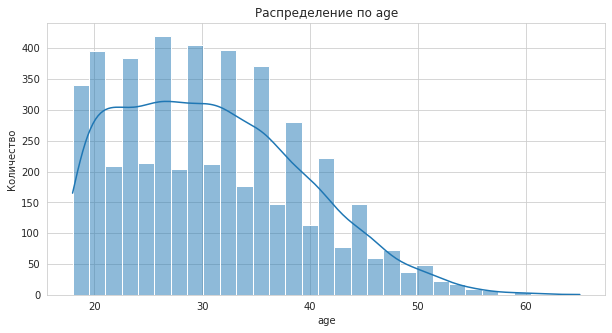

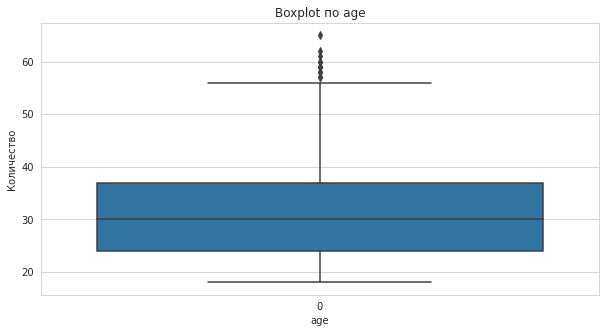

In [9]:
graphs_creator('age')

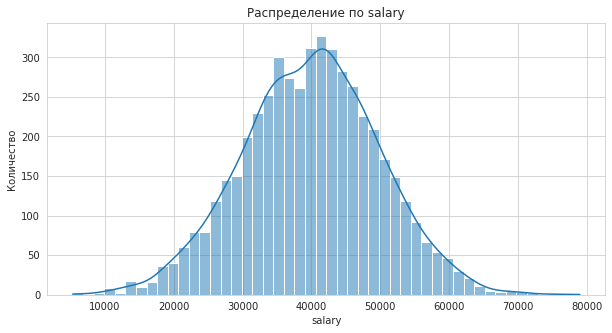

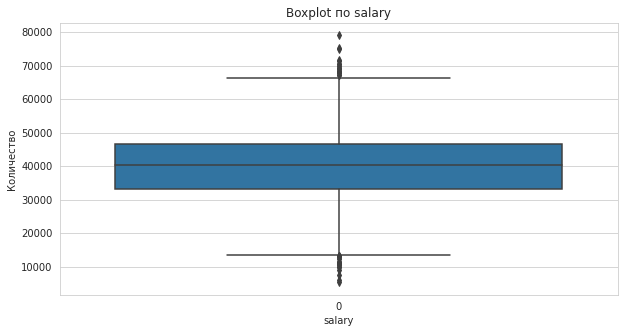

In [10]:
graphs_creator('salary')

<Figure size 720x360 with 0 Axes>

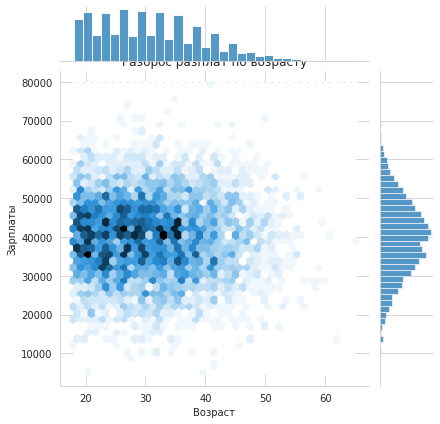

In [11]:
plt.figure(figsize=(10, 5))
sns.jointplot(x=df['age'], y=df['salary'], kind='hex')
plt.title('Разброс разплат по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Зарплаты')
plt.show()

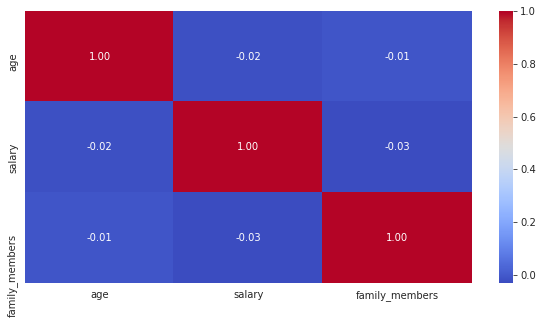

In [12]:
corr_matrix = df[['age', 'salary', 'family_members']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [13]:
def cathegorial_graph_creator(field):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[field])
    plt.title(f'Столбчатая диаграмма для {field}')
    plt.xlabel(f'{field}')
    plt.ylabel('Количество')
    plt.show()

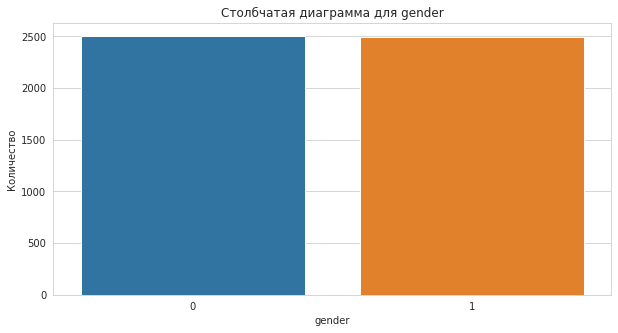

In [14]:
cathegorial_graph_creator('gender')

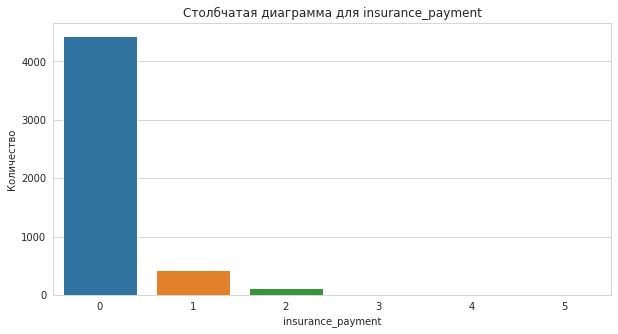

In [15]:
cathegorial_graph_creator('insurance_payment')

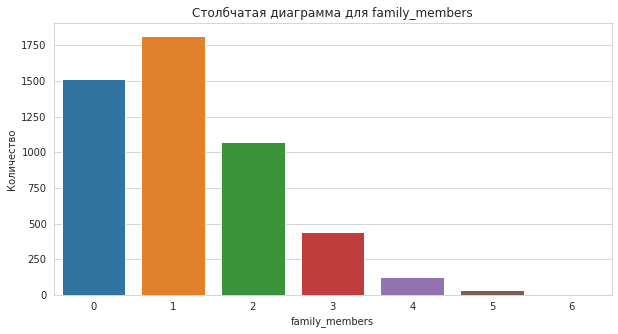

In [16]:
cathegorial_graph_creator('family_members')

**Вывод**

- Между количественными признаками корреляции нет
- Большинство клиентов – люди с зарплатой 40-48к
- Как правило, клиенты – люди во возрасте 20-35 лет
- В данных поровну пользователей разных полов
- Как правило, это одинокие люди или люди с ещё одним-двумя членами семьи

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**По ТЗ**

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

a. Изменится. Приведите примеры матриц.

b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** 
Качество линейной регрессии не изменится, если признаки умножаются на обратимую матрицу. Это происходит потому, что параметры линейной регрессии будут соответствующим образом преобразованы, чтобы компенсировать изменения в данных. 

**Обоснование:** 
На формулах:

Исходная формула линейной регрессии имеет следующий вид: y = X * w + ε

Если мы умножим матрицу признаков X на обратимую матрицу A, то новая матрица признаков будет X_new = X * A. Тогда линейная регрессия с новой матрицей признаков будет иметь вид: y = X_new * w_new + ε

w_new – это новый вектор параметров регрессии – он равен A^(-1) * w, где A^(-1) – матрица, обртаная к А

То есть,
- Параметры линейной регрессии связаны в исходной задаче обратимой линейной трансформацией (или же умножением на обратную матрицу)
- Линейная регрессия обучается для нахождения оптимальных параметров

Следовательно, модель просто адаптирует эти параметры к новым данным после преобразования, и качество модели не изменится

## Алгоритм преобразования

In [17]:
# Для начала разделим признаки на матрицу признаков и вектор "ответов"
X = df.drop('insurance_payment', axis=1)
y = df['insurance_payment']

print(X.shape)
print(y.shape)

(5000, 4)
(5000,)


In [18]:
# Создадим случайную матрицу 
def get_random_invertible_matrix(rows, cols):
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(rows, cols))
        det = np.linalg.det(matrix)
    return matrix

P = get_random_invertible_matrix(4, 4)
P

array([[-1.92498678,  2.39289205, -1.5367138 , -0.0959385 ],
       [-0.22537521,  1.00713752, -0.77976808,  1.07059219],
       [ 0.18969039,  0.00360103, -0.25855059,  0.49537418],
       [-1.15471191, -1.52042391,  0.2737209 ,  0.48296087]])

In [19]:
# Проверим обратимость полученной матрицы
# Для этого определитель должен быть != 0

def is_matrix_invertible(matrix):
    try:
        determinant = np.linalg.det(matrix)
        return 'Матрица обратима'
    except np.linalg.LinAlgError:
        return 'Матрица необратима из-за ошибки вычисления'

In [20]:
is_matrix_invertible(P)

'Матрица обратима'

In [21]:
# multiplied_matrix = np.dot(X, P) меняет тип и пропадает атрибут head – дальше с ней работать не выйдет

multiplied_matrix = X @ P
multiplied_matrix.head()

,0,1,2,3
0,9396.323400,220.776335,-12857.342916,24614.840847
1,7196.712954,181.647150,-9860.518159,18873.949208
2,3976.962367,104.828678,-5452.175735,10433.905045
3,7903.047076,168.272110,-10797.387432,20680.551846
4,4942.683759,124.579700,-6771.540707,12959.146855


Теперь на этой матрице применим формулу $$w = (X^T X)^{-1} X^T y$$, чтобы вычислить веса

In [22]:
# Для НЕпреобразованной матрицы
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([-4.43854686e-02,  2.33356224e-02, -1.17739038e-05, -4.55168125e-02])

In [23]:
w_1 = np.linalg.inv(multiplied_matrix.T.dot(multiplied_matrix)).dot(multiplied_matrix.T).dot(y)
w_1

array([0.01170882, 0.05090537, 0.09082829, 0.0425286 ])

Применим формулу предсказания $$a = Xw$$

In [24]:
# Для НЕпреобразованной матрицы
a = X @ w

In [25]:
a_1 = multiplied_matrix @ w_1

In [26]:
difference = (a - a_1).sum()
difference

2.6543350952834143e-05

**Алгоритм**

С помощью Numpy мы сгенерировали рандомную матрицу и домножили на неё имеющуюся. Далее мы вычислили веса и применили формулу предсказания для преобразованной и непреобразованной матриц. Финальным шагом было проверка разницы между двумя предсказаниями и анализ результата

**Обоснование**

Проанализировав вектор разницы предсказаний по оригинальным и преобразованным признакам, и сохранив его в переменную difference, мы получили очень маленькое число, что говорит о том, что преобразование не ухудшает качество модели

## Проверка алгоритма

Алгоритм мы будем проверять на
- Готовом алгоритме линейной регрессии из sklearn
- Собственном алгоритме линейной регрессии

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    test_size=0.25)

# (X_(edited)_train, etc)
X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(multiplied_matrix, y,
                                                            random_state=42, 
                                                            test_size=0.25)

In [28]:
print(f'X_train: {X_train.shape}\n'
      f'X_test: {X_test.shape}\n' 
      f'y_train: {y_train.shape}\n' 
      f'y_test: {y_test.shape}')

X_train: (3750, 4)
X_test: (1250, 4)
y_train: (3750,)
y_test: (1250,)


In [29]:
print(f'X_e_train: {X_e_train.shape}\n'
      f'X_e_test: {X_e_test.shape}\n' 
      f'y_e_train: {y_e_train.shape}\n' 
      f'y_e_test: {y_e_test.shape}')

X_e_train: (3750, 4)
X_e_test: (1250, 4)
y_e_train: (3750,)
y_e_test: (1250,)


**Для начала я попробую обучить данные на каскадной модели, чтобы убедиться, что в данных есть закономерности**

Для этого используем DummyRegressor()

In [30]:
def dummy_regressor(X_train, X_test, y_train, y_test):
    model = DummyRegressor(strategy='mean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

In [31]:
r2_dummy = dummy_regressor(X_train, X_test, y_train, y_test)
r2_dummy_edited = dummy_regressor(X_e_train, X_e_test, y_e_train, y_e_test)

print(f'Main Dummy R2: {r2_dummy}\n' 
      f'Edited Dummy R2: {r2_dummy_edited}')

Main Dummy R2: 0.0
Edited Dummy R2: 0.0


На моделях коэффициент детерминации должен быть больше, тогда модель будет считаться качественной

In [32]:
# так как модели будет 2, создадим функцию, чтобы не было повторов

def regression_from_sklearn(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

In [33]:
r2 = regression_from_sklearn(X_train, X_test, y_train, y_test)
r2

0.4254778540696319

In [34]:
r2_edited = regression_from_sklearn(X_e_train, X_e_test, y_e_train, y_e_test)
r2_edited

0.4254778540699796

In [35]:
res_sklearn = r2_edited - r2 
res_sklearn

3.4772185131259903e-13

**Вывод**

В модели из библиотеки sklearn разницы в обучении практически нет

In [36]:
# В ТЗ указан только sklearn, но чтобы точно убедиться, я этот алгоритм тоже попробую

class MyLinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [37]:
def my_regression(X_train, X_test, y_train, y_test):
    model = MyLinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

In [38]:
r2_my = my_regression(X_train, X_test, y_train, y_test)
r2_my

0.425477854069632

In [39]:
r2_edited_my = my_regression(X_e_train, X_e_test, y_e_train, y_e_test)
r2_edited_my

0.42547785354725365

In [40]:
res_my = r2_edited_my - r2_my
res_my

-5.223783627883449e-10

**Вывод**

В собственном классе регрессии ситуация аналогичная, как и в sklearn

**Общий вывод**

- Мы получили данные о 5000 пользователях страховой компании
- В предобработке данные не нуждались
- В ходе исследовательского анализа выяснилось, что корреляция, как таковая, между признаками отсуствтует, большинство клиентов имеют доход 42-48к, возраст большинства – 20-25 лет.




- Необходимо было доказать или опровергнуть, что преобразованные данные не имеют отличий для алгоритма машинного обучения
- Посредством линейной алгебры получилось доказать, что значения исходных и преобразованных данных не имеют значительных различий.
- Проверка проводилась на уже готовой модели из sklearn, а также на модели, написанной в ручную.
- Поскольку данные различий не имеют, мы можем сказать, что мы справились с задачей: защитили данные клиентов, не ухудшив качество модели